In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importing the databases that we need


In [2]:
# loading in statistics for college players
college_stats = pd.read_csv('all_college_data.csv')

# removing college players that were not drafted
college_stats = college_stats[college_stats['Pick'].notna()]

# dropping all the coloumns that are not going to be used in estimation
cols = ['Player', 'Pick', 'GP', 'MPG', 'WS', 'ORB', 'DRB', 'APG', 'BPG', 'SPG', 'FTM', 'FT%', '3PM', '3P%', 'TS%', 'TOV', 'eFG%', 'ORtg', 'DRtg']
college_stats = college_stats[cols]

# loading in career stats for NBA
# these include averages of culmulative season from 2009 to 2021
# not exactly career averages, but a good enough span for young players
nba_stats = pd.read_csv('NBA_data.csv')

# removing all columns except Player efficiency rating (PER) which is our target
nba_stats = nba_stats[['Player', 'PER']]

# joining college stats on player Name to add target of PER
data = college_stats.set_index('Player').join(nba_stats.set_index('Player'))
data.reset_index(inplace=True)


# making sure we have a PER for every player in our data set, remove those who don't 
data = data[data['PER'].notna()]
data = data.sort_values(by=['Player'])

data.describe()

,Pick,GP,MPG,WS,ORB,DRB,APG,BPG,SPG,FTM,FT%,3PM,3P%,TS%,TOV,eFG%,ORtg,DRtg,PER
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,368.000000,372.000000,368.000000,368.000000,368.000000,372.000000
mean,24.838710,34.239247,31.735215,4.203226,1.998118,4.700457,2.452608,1.013871,1.221290,3.700565,0.732871,1.091048,0.312237,0.586359,2.321183,0.548288,117.243207,94.011685,24.120161
std,15.529671,2.997621,3.568275,3.771676,1.045037,1.666785,1.627153,0.907953,0.526435,1.414923,0.090734,0.933787,0.160687,0.044760,0.631981,0.045582,7.432751,6.892420,4.297764
min,1.000000,22.000000,19.100000,-0.400000,0.170000,1.700000,0.200000,0.000000,0.200000,0.760000,0.295000,0.000000,0.000000,0.488000,0.700000,0.423000,96.400000,54.300000,9.500000
25%,11.000000,32.000000,30.000000,1.200000,1.100000,3.400000,1.300000,0.300000,0.800000,2.700000,0.676750,0.200000,0.277500,0.558000,1.860000,0.515000,112.200000,89.450000,21.100000
50%,24.000000,34.000000,32.000000,3.550000,2.000000,4.500000,1.900000,0.800000,1.200000,3.500000,0.742500,0.900000,0.346000,0.582000,2.280000,0.547500,116.600000,94.000000,23.900000
75%,37.000000,37.000000,34.125000,6.300000,2.700000,5.800000,3.225000,1.400000,1.600000,4.600000,0.799250,1.900000,0.398000,0.616000,2.700000,0.577000,121.625000,98.325000,27.000000
max,60.000000,41.000000,38.400000,19.200000,5.700000,10.500000,9.750000,5.400000,3.000000,8.700000,0.974000,3.900000,1.000000,0.948000,4.400000,0.671000,140.500000,136.200000,42.300000


Cleaning the Data

In [3]:
# filling in means for NaN values in stats
# not many NaN values, because we are taking drafted players only(i.e. high value players, which typically have complete statistics)
# therefore mean is appropriate

# we do not do this for picks over PER cause we already filter out NaN values for them
cols_to_adjust = cols[2:]


for col in cols_to_adjust:
   data[col] = data[col].fillna(data[col].mean())

data.describe() # cleaned data

,Pick,GP,MPG,WS,ORB,DRB,APG,BPG,SPG,FTM,FT%,3PM,3P%,TS%,TOV,eFG%,ORtg,DRtg,PER
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,24.838710,34.239247,31.735215,4.203226,1.998118,4.700457,2.452608,1.013871,1.221290,3.700565,0.732871,1.091048,0.312237,0.586359,2.321183,0.548288,117.243207,94.011685,24.120161
std,15.529671,2.997621,3.568275,3.771676,1.045037,1.666785,1.627153,0.907953,0.526435,1.414923,0.090734,0.933787,0.160687,0.044518,0.631981,0.045336,7.392573,6.855163,4.297764
min,1.000000,22.000000,19.100000,-0.400000,0.170000,1.700000,0.200000,0.000000,0.200000,0.760000,0.295000,0.000000,0.000000,0.488000,0.700000,0.423000,96.400000,54.300000,9.500000
25%,11.000000,32.000000,30.000000,1.200000,1.100000,3.400000,1.300000,0.300000,0.800000,2.700000,0.676750,0.200000,0.277500,0.558000,1.860000,0.515750,112.200000,89.500000,21.100000
50%,24.000000,34.000000,32.000000,3.550000,2.000000,4.500000,1.900000,0.800000,1.200000,3.500000,0.742500,0.900000,0.346000,0.582500,2.280000,0.548144,116.600000,94.011685,23.900000
75%,37.000000,37.000000,34.125000,6.300000,2.700000,5.800000,3.225000,1.400000,1.600000,4.600000,0.799250,1.900000,0.398000,0.616000,2.700000,0.576250,121.600000,98.300000,27.000000
max,60.000000,41.000000,38.400000,19.200000,5.700000,10.500000,9.750000,5.400000,3.000000,8.700000,0.974000,3.900000,1.000000,0.948000,4.400000,0.671000,140.500000,136.200000,42.300000


Correlation Matrix

In [4]:
corr = data.corr().abs()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-4-e01d04d4f8c2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr().abs()
<ipython-input-4-e01d04d4f8c2>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Pick,GP,MPG,WS,ORB,DRB,APG,BPG,SPG,FTM,FT%,3PM,3P%,TS%,TOV,eFG%,ORtg,DRtg,PER
Pick,1.00,0.06,0.03,0.44,0.05,0.12,0.08,0.11,0.10,0.19,0.01,0.07,0.00,0.04,0.19,0.03,0.05,0.12,0.17
GP,0.06,1.00,0.14,0.04,0.07,0.10,0.07,0.08,0.08,0.27,0.12,0.01,0.04,0.05,0.22,0.06,0.09,0.28,0.09
MPG,0.03,0.14,1.00,0.03,0.24,0.06,0.47,0.28,0.37,0.45,0.41,0.43,0.23,0.05,0.46,0.23,0.06,0.30,0.06
WS,0.44,0.04,0.03,1.00,0.06,0.09,0.11,0.02,0.15,0.18,0.08,0.00,0.02,0.09,0.09,0.05,0.20,0.08,0.21
ORB,0.05,0.07,0.24,0.06,1.00,0.70,0.62,0.62,0.29,0.01,0.48,0.70,0.45,0.00,0.23,0.17,0.02,0.34,0.40
DRB,0.12,0.10,0.06,0.09,0.70,1.00,0.37,0.57,0.19,0.18,0.26,0.48,0.25,0.00,0.00,0.08,0.03,0.40,0.48
APG,0.08,0.07,0.47,0.11,0.62,0.37,1.00,0.52,0.54,0.16,0.34,0.41,0.28,0.10,0.56,0.29,0.01,0.25,0.14
BPG,0.11,0.08,0.28,0.02,0.62,0.57,0.52,1.00,0.38,0.12,0.46,0.60,0.32,0.03,0.20,0.20,0.09,0.40,0.26
SPG,0.10,0.08,0.37,0.15,0.29,0.19,0.54,0.38,1.00,0.15,0.20,0.33,0.23,0.14,0.31,0.22,0.02,0.07,0.07
FTM,0.19,0.27,0.45,0.18,0.01,0.18,0.16,0.12,0.15,1.00,0.45,0.13,0.08,0.19,0.47,0.13,0.23,0.24,0.50


Splitting the Data

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score


# we remove pick as the goal is to determine the value of a college prospect
# therefore their draft order cannot be considered although it has a high correlation
X = data.drop(['Pick','Player', 'PER'], axis = 1)
y = data['PER']

# split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

X_train

,GP,MPG,WS,ORB,DRB,APG,BPG,SPG,FTM,FT%,3PM,3P%,TS%,TOV,eFG%,ORtg,DRtg
120,33,32.1,14.7,1.80,4.50,4.40,1.30,2.20,5.90,0.779,0.40,0.318,0.573,3.20,0.515,118.8,96.3
258,27,35.3,4.9,3.30,7.10,1.40,0.60,0.90,7.20,0.719,0.10,0.333,0.567,2.40,0.500,115.0,99.0
235,39,29.6,14.3,3.60,7.00,1.90,1.40,0.70,5.10,0.767,0.70,0.354,0.644,2.00,0.595,132.2,85.4
393,37,31.5,0.2,2.60,4.50,1.30,1.10,1.60,2.10,0.658,0.80,0.316,0.573,1.70,0.557,116.6,88.1
154,31,32.0,2.4,1.70,4.20,3.50,0.20,2.70,4.50,0.801,1.40,0.278,0.517,2.30,0.454,110.2,92.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,38,31.5,7.3,2.40,6.40,1.60,1.90,1.10,4.10,0.646,0.70,0.329,0.512,2.00,0.470,108.7,89.0
221,38,27.6,1.7,2.53,5.32,2.16,1.29,1.45,1.92,0.613,0.08,0.231,0.566,2.39,0.553,109.1,82.9
136,30,29.5,0.0,3.60,5.90,0.60,1.40,1.00,3.10,0.550,0.00,0.000,0.560,2.50,0.556,105.8,92.9
55,30,30.4,6.4,2.90,4.60,1.90,2.10,0.60,3.00,0.788,0.10,0.600,0.605,1.60,0.557,126.6,104.1


Preprocessing Data

In [6]:
from sklearn import preprocessing

# defining an object of MinMaxScaler()
min_max_scaler = preprocessing.MinMaxScaler()

# normalize values between 0 and 1 using the training data
X_train_scaled = min_max_scaler.fit_transform(X_train)

# visualizing shape of scaled data
X_train_scaled.shape

(260, 17)

Linear Regression

In [7]:
from sklearn import linear_model
# defining the model as an object of LinearRegression()
lin_model = linear_model.LinearRegression()

# fit the model on the scaled training data
lin_model.fit(X_train_scaled, y_train)

# Model evaluation with normalization using test set 
min_max_scaler_2 = preprocessing.MinMaxScaler()

X_test_scaled = min_max_scaler_2.fit_transform(X_test)

# calculate the R^2 score
lin_model.score(X_test_scaled, y_test)

-4.891196162361974

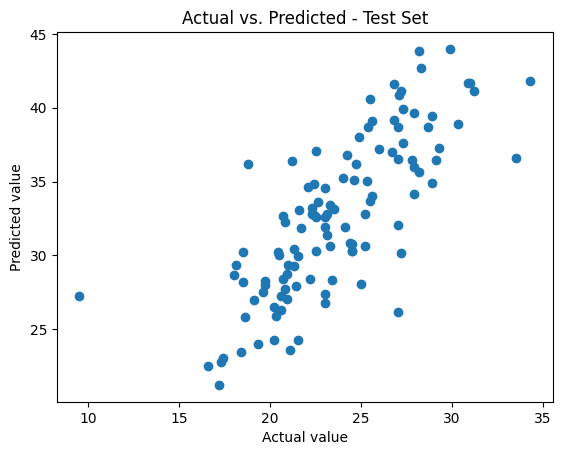

In [8]:
# calculate the predicted values for test data
y_pred_test = lin_model.predict(X_test_scaled)

# visualize the difference between actual and predicted data using scatter plot
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual vs. Predicted - Test Set")
plt.show()

In [9]:
# In order to improve the score for the Linear Regression, Regularization was added using Lasso with provides L1 Regularization
lasso_model = linear_model.Lasso(alpha=0.07)

# fit the model on the scaled training data
lasso_model.fit(X_train_scaled, y_train)

# calculate the R^2 score
lasso_model.score(X_test_scaled, y_test)

0.37392527328186287

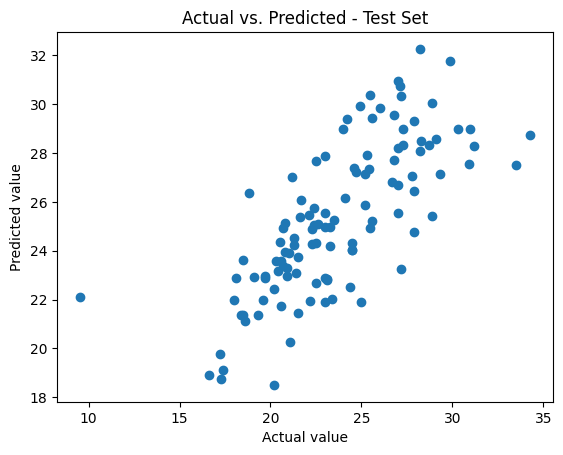

In [10]:
# calculate the predicted values for test data
y_pred_test = lasso_model.predict(X_test_scaled)

# visualize the difference between actual and predicted data using scatter plot
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual vs. Predicted - Test Set")
plt.show()

In [11]:
# In order to further investigate, L2 Regularization was tried using Ridge Model
ridge_model = linear_model.Ridge(alpha=10)

# fit the model on the scaled training data
ridge_model.fit(X_train_scaled, y_train)

# calculate the R^2 score
ridge_model.score(X_test_scaled, y_test)

0.42828499589950164

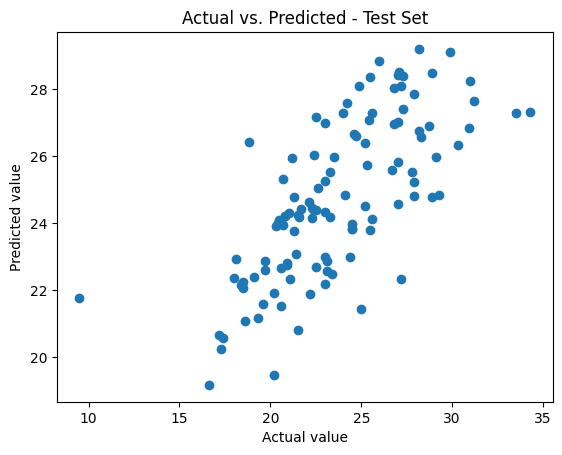

In [12]:
# calculate the predicted values for test data
y_pred_test = ridge_model.predict(X_test_scaled)

# visualize the difference between actual and predicted data using scatter plot
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual vs. Predicted - Test Set")
plt.show()